In [1]:
!pip install koreanize-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 56.7 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
from plotnine import *
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
import folium
from geopy.distance import geodesic
from geopy.geocoders import Nominatim

import warnings
warnings.filterwarnings('ignore')

데이터 준비하기

In [3]:
shop_2022 = pd.read_csv('/content/소상공인시장진흥공단_상가(상권)정보_세종_202212.csv')
shop_2022.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,17173962,5바,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,3611010700103610039000001,메가타워1,세종특별자치시 나성북로 9,339003.0,30128.0,NaN,NaN,NaN,127.257850,36.489644
1,24286366,동양농기연기대전대리,NaN,D,소매,D21,철물/난방/건설자재소매,D21A01,건축백화점,G47519,...,4473034021102380008029093,NaN,세종특별자치시 금남면 성덕영곡길 16,339835.0,30083.0,NaN,NaN,NaN,127.277224,36.461005
2,20755519,코리아부동산,NaN,L,부동산,L01,부동산중개,L01A01,부동산중개,L68221,...,4473033033105430000000005,첫마을3단지,세종특별자치시 나리1로 16,339014.0,30130.0,311,NaN,NaN,127.259039,36.477278
3,23505124,수목길,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,3611036033107050001000001,NaN,세종특별자치시 연서면 당산로 262,339813.0,30047.0,NaN,NaN,NaN,127.277934,36.556431
4,11720062,세븐일레븐세종침산원룸점,세종침산원룸점,D,소매,D03,종합소매점,D03A01,편의점,G47122,...,3611025028102850015000001,NaN,세종특별자치시 조치원읍 문화1길 10,339887.0,30020.0,NaN,1,NaN,127.289619,36.600264


데이터 확인하기

In [4]:
shop_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13399 entries, 0 to 13398
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     13399 non-null  int64  
 1   상호명        13399 non-null  object 
 2   지점명        2277 non-null   object 
 3   상권업종대분류코드  13399 non-null  object 
 4   상권업종대분류명   13399 non-null  object 
 5   상권업종중분류코드  13399 non-null  object 
 6   상권업종중분류명   13399 non-null  object 
 7   상권업종소분류코드  13399 non-null  object 
 8   상권업종소분류명   13399 non-null  object 
 9   표준산업분류코드   12435 non-null  object 
 10  표준산업분류명    12435 non-null  object 
 11  시도코드       13399 non-null  int64  
 12  시도명        13399 non-null  object 
 13  시군구코드      13399 non-null  int64  
 14  시군구명       13399 non-null  object 
 15  행정동코드      13399 non-null  int64  
 16  행정동명       13399 non-null  object 
 17  법정동코드      13399 non-null  int64  
 18  법정동명       13399 non-null  object 
 19  지번코드       13399 non-null  int64  
 20  대지구분코드

In [5]:
shop_2022['상권업종대분류명'].unique()

array(['음식', '소매', '부동산', '생활서비스', '학문/교육', '관광/여가/오락', '숙박', '스포츠'],
      dtype=object)

In [6]:
shop_2022['상권업종중분류명'].unique()

array(['유흥주점', '철물/난방/건설자재소매', '부동산중개', '한식', '종합소매점', '자동차/이륜차',
       '건강/미용식품', '유아용품', '선물/팬시/기념품', '주택수리', '음/식료품소매', '가구소매', '패스트푸드',
       '학원-음악미술무용', '화장품소매', '세탁/가사서비스', '학원-보습교습입시', '물품기기대여', '이/미용/건강',
       '분식', '일식/수산물', '중식', '자동차/자동차용품', '중고품소매/교환', '유아교육',
       '가정/주방/인테리어', '개인/가정용품수리', '광고/인쇄', '주유소/충전소', '학원-어학', '의복의류',
       'PC/오락/당구/볼링등', '닭/오리요리', '대행업', '기타음식업', '무도/유흥/가무', '학문교육기타',
       '기타판매업', '장례/묘지', '별식/퓨전요리', '학원기타', '가방/신발/액세서리', '사무/문구/컴퓨터',
       '사진/광학/정밀기기소매', '기타서비스업', '인력/고용/용역알선', '모텔/여관/여인숙', '학원-예능취미체육',
       '운동/경기용품소매', '도서관/독서실', '가전제품소매', '의약/의료품소매', '행사/이벤트', '운영관리시설',
       '애견/애완/동물', '음식배달서비스', '커피점/카페', '분양', '요가/단전/마사지', '책/서적/도서',
       '대중목욕탕/휴게', '부페', '페인트/유리제품소매', '실내운동시설', '양식', '법무세무회계',
       '캠프/별장/펜션', '놀이/여가/취미', '연극/영화/극장', '제과제빵떡케익', '실외운동시설',
       '취미/오락관련소매', '사진', '평가/개발/관리', '예술품/골동품/수석/분재', '운송/배달/택배',
       '개인서비스', '예식/의례/관혼상제', '경마/경륜/성인오락', '시계/귀금속소매', '학원-창업취업취미',
       '학원-자격/국가고시', '호텔/콘도'

In [7]:
shop_2022['표준산업분류명'].unique()

array(['기타 주점업', '페인트, 유리 및 기타 건설자재 소매업', '부동산 자문 및 중개업', '한식 음식점업',
       '체인화 편의점', nan, '건강보조식품 소매업', '그외 기타 분류안된 가정용품 소매업',
       '화초 및 산식물 소매업', '배관 및 냉·난방 공사업', '과실 및 채소 소매업', '가구 소매업', '슈퍼마켓',
       '피자, 햄버거, 샌드위치 및 유사 음식점업', '일반유흥 주점업', '철물 및 난방용구 소매업', '예술 학원',
       '화장품 및 방향제 소매업', '기타 식료품 소매업', '자동차 세차업', '가정용 세탁업', '일반 교과 학원',
       '자동차 임대업', '두발미용업', '분식 및 김밥 전문점', '중식 음식점업', '그외 기타 종합 소매업',
       '자동차 타이어 및 튜브 판매업', '수산물 소매업', '유리 및 창호 공사업', '기타 중고상품 소매업',
       '기타 음·식료품 위주 종합 소매업', '육류 소매업', '보육시설 운영업', '식탁 및 주방용품 소매업',
       '가전제품 수리업', '그외 기타 건축마무리 공사업', '간판 및 광고물 제조업', '차량용 주유소 운영업',
       '외국어학원', '한복 소매업', '당구장 운영업', '기타 사무지원 서비스업', '기관구내식당업',
       '노래연습장 운영업', '그외 기타 스포츠 서비스업', '셔츠 및 기타 의복 소매업',
       '그외 기타 분류안된 상품 전문 소매업', '화장, 묘지분양 및 관리업', '가정용 직물제품 소매업',
       '그외 기타 분류안된 교육기관', '기타 섬유, 직물 및 의복액세서리 소매업', '문구용품 소매업',
       '기계공구 소매업', '일식 음식점업', '치킨 전문점', '안경 소매업', '경영컨설팅업', '여관업',
       '중고 자동차 판매업', '가방 및 기타 가죽제품 소매업', '남녀용 정장 소매업',
       '기

데이터 전처리

In [8]:
shop_2022.shape

(13399, 39)

In [9]:
shop_2022[shop_2022['상권업종소분류명'].str.contains('커피')]

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
239,16166632,커피예술,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,3611010700104740000000001,세종퍼스트타워,세종특별자치시 한누리대로 211,339003.0,30130.0,NaN,1,NaN,127.259471,36.483508
243,16166586,청년다방,세종종촌점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,3611011100106680000000001,금강빌딩,세종특별자치시 달빛로 43,339013.0,30064.0,NaN,1,NaN,127.250023,36.502717
258,16165956,브라운힐스커피숍,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,3611010600101670003000002,브라운스84,세종특별자치시 노을3로 84,339014.0,30130.0,NaN,1,NaN,127.255315,36.479328
328,16201240,바이핸커피,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,3611011000101030079000001,태한프레스센터,세종특별자치시 절재로 172,339012.0,30102.0,NaN,NaN,NaN,127.260141,36.508116
374,5079543,콜다방,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,4473034021101930001029859,NaN,세종특별자치시 금남면 대평시장1길 18,339835.0,30083.0,NaN,1,NaN,127.282200,36.467019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13141,19008918,알리카페,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,3611033021102840000000001,NaN,세종특별자치시 세종특별자치시 부강면 부강행산로 70-13,339941.0,30072.0,1,2,NaN,127.367372,36.536526
13164,19017827,카페,로만플라워,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,3611010200100320053000001,새샘마을1단지,세종특별자치시 세종특별자치시 남세종로 357,339010.0,30150.0,상가3,3,NaN,127.298806,36.480321
13316,19089156,이너프,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,3611011800107260000000001,지식산업센터,세종특별자치시 세종특별자치시 집현중앙7로 6,339007.0,30141.0,A,NaN,NaN,127.330443,36.498608
13323,19102003,707COFFEE세종,보람점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,3611010300107000076000002,아평빌딩,세종특별자치시 세종특별자치시 남세종로 466,339008.0,30150.0,NaN,1,NaN,127.288382,36.476718


In [10]:
coffee = shop_2022[shop_2022['상권업종소분류명'].str.contains('커피')]
coffee.shape

(679, 39)

In [11]:
# 상호명으로 봤을 떄 커피점은
coffee['상호명'].unique().shape


(575,)

In [12]:
coffee['상호명'].value_counts()

카페                       40
이디야커피                    12
빽다방                       9
투썸플레이스                    8
스타벅스                      5
                         ..
커피아노                      1
카페아이갓에브리싱세종고용복지플러스센터점     1
마녀의만화소굴                   1
소담꽃약차전문점                  1
메조네뜨                      1
Name: 상호명, Length: 575, dtype: int64

In [13]:
len(coffee[coffee['상호명'] == '스타벅스']) 

5

In [14]:
# 스타벅스 옆에 이디야가 입점 했는지
# 스타벅스 데이터 찾기
len(coffee[coffee['상호명'].str.contains('스타벅스')]) # 스타벅스

7

In [15]:
coffee.loc[coffee['상호명'].str.contains('스타벅스'), '상호명'].unique()

array(['스타벅스세종종촌점', '스타벅스', '스타벅스세종어진점'], dtype=object)

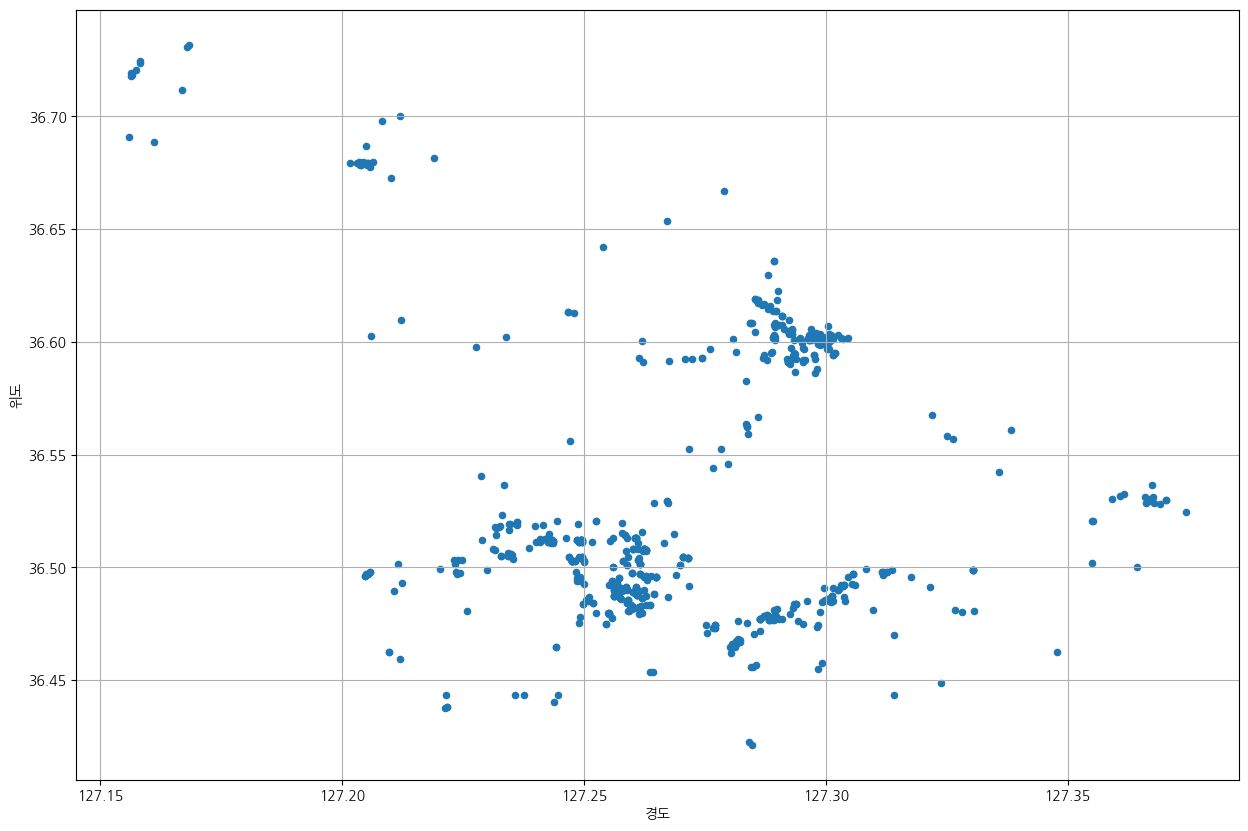

In [16]:
coffee.plot.scatter(x = '경도', y ='위도', grid = True, figsize = (15,10))
plt.show()

커피 업종 지도 표출

In [17]:
# 커피 업종 상가 위치의 평균 위도, 경도를 활용하여 중심 좌표를 사용
map = folium.Map(location = [coffee['위도'].mean(),coffee['경도'].mean()], zoom_start = 11)

for n in coffee.index:
  folium.Marker([coffee.loc[n,'위도'], coffee.loc[n,'경도']],
                popup = coffee.loc[n,'상호명'],
                icon = folium.Icon(color = 'darkred', icon = 'coffee', prefix = 'fa')).add_to(map)

map

배스킨라빈스와 던킨도너츠 입지분석

In [18]:
df_31 = shop_2022[shop_2022['상호명'].str.contains('배스킨|던킨')].copy()
df_31.shape

(17, 39)

In [19]:
df_31.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [20]:
# 입지 분석에 필요한 컬럼 정리
df_31 = df_31[['상호명', '지점명', '상권업종대분류명','상권업종중분류명', '지번주소', '도로명주소', 
       '위도', '경도', '시군구명', '행정동명']]
df_31

,상호명,지점명,상권업종대분류명,상권업종중분류명,지번주소,도로명주소,위도,경도,시군구명,행정동명
818,배스킨라빈스,세종조치원점,음식,분식,세종특별자치시 조치원읍 원리 10-18,세종특별자치시 조치원읍 으뜸길 222,36.601542,127.296984,세종특별자치시,조치원읍
1027,배스킨라빈스31,세종첫마을점,음식,패스트푸드,세종특별자치시 세종특별자치시 한솔동 946,세종특별자치시 세종특별자치시 노을1로 16,36.480434,127.260839,세종특별자치시,한솔동
1254,배스킨라빈스31,세종홈플러스점,음식,패스트푸드,세종특별자치시 세종특별자치시 어진동 503,세종특별자치시 세종특별자치시 절재로 154,36.507386,127.258797,세종특별자치시,도담동
1255,배스킨라빈스31,세종보람점,음식,패스트푸드,세종특별자치시 세종특별자치시 보람동 629-5,세종특별자치시 세종특별자치시 남세종로 446,36.477577,127.290495,세종특별자치시,보람동
1281,던킨도너츠,세종나성점,음식,기타음식업,세종특별자치시 나성동 361-50,세종특별자치시 나성북로 30,36.489064,127.260244,세종특별자치시,새롬동
1731,배스킨라빈스,세종반곡,음식,패스트푸드,세종특별자치시 반곡동 45-14,세종특별자치시 한누리대로 1828,36.498051,127.311740,세종특별자치시,소담동
2124,배스킨라빈스세종첫마을점,세종첫마을점,음식,패스트푸드,세종특별자치시 한솔동 941,세종특별자치시 노을3로 25,36.480849,127.259329,세종특별자치시,한솔동
5129,던킨세종다정점,NaN,음식,패스트푸드,세종특별자치시 나성동 727,세종특별자치시 한누리대로 331,36.493931,127.255834,세종특별자치시,새롬동
5132,배스킨라빈스31,세종나성점,음식,패스트푸드,세종특별자치시 나성동 361-50,세종특별자치시 나성북로 30,36.489064,127.260244,세종특별자치시,새롬동
5134,배스킨라빈스세종종촌점,세종종촌점,음식,패스트푸드,세종특별자치시 종촌동 672,세종특별자치시 도움1로 106,36.502813,127.248124,세종특별자치시,종촌동


In [21]:
# 상호명에 따른 상점의 개수 확인
df_31['상호명'].value_counts()

배스킨라빈스31        7
배스킨라빈스          5
던킨도너츠           1
배스킨라빈스세종첫마을점    1
던킨세종다정점         1
배스킨라빈스세종종촌점     1
배스킨라빈스세종이마트     1
Name: 상호명, dtype: int64

In [22]:
# 브랜드명이라는 컬럼을 새로 생성
df_31['브랜드명'] = ''
#컬럼확인
df_31[['상호명', '브랜드명']].head()

,상호명,브랜드명
818,배스킨라빈스,
1027,배스킨라빈스31,
1254,배스킨라빈스31,
1255,배스킨라빈스31,
1281,던킨도너츠,


In [23]:
# 브랜드먕(배스킨라빈스, 던킨더너츠) 부여
df_31.loc[df_31['상호명'].str.contains('배스킨'), '브랜드명'] = '배스킨라빈스'
df_31.loc[df_31['상호명'].str.contains('던킨'), '브랜드명'] = '던킨도너츠'

#컬럼확인
df_31[['상호명', '브랜드명']].head()

,상호명,브랜드명
818,배스킨라빈스,배스킨라빈스
1027,배스킨라빈스31,배스킨라빈스
1254,배스킨라빈스31,배스킨라빈스
1255,배스킨라빈스31,배스킨라빈스
1281,던킨도너츠,던킨도너츠


In [24]:
# 브랜드명에 따른 상점 개수
df_31['브랜드명'].value_counts()

배스킨라빈스    15
던킨도너츠      2
Name: 브랜드명, dtype: int64

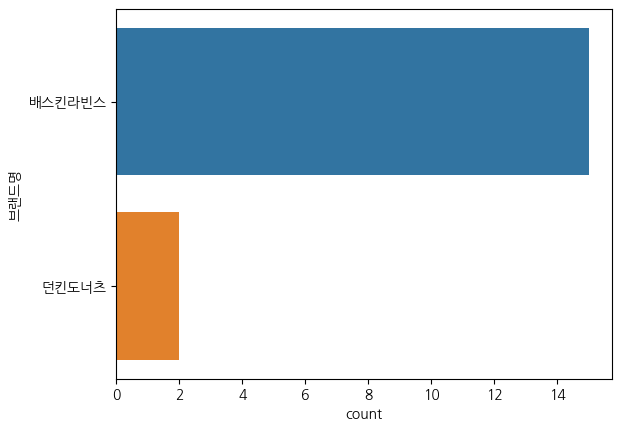

In [25]:
sns.countplot(data = df_31, y = '브랜드명')
plt.show()

In [26]:
df_31_group_cnt = df_31['브랜드명'].value_counts()
df_31_ratio = df_31_group_cnt[0] / df_31_group_cnt[1]

In [27]:
print('제공된 데이톨 봤을 때 세종에는 던킨도너츠보다 배스킨라빈스의 매장이 {0:.2f}배 가량 많습니다.'.format(df_31_ratio))

제공된 데이톨 봤을 때 세종에는 던킨도너츠보다 배스킨라빈스의 매장이 7.50배 가량 많습니다.


d

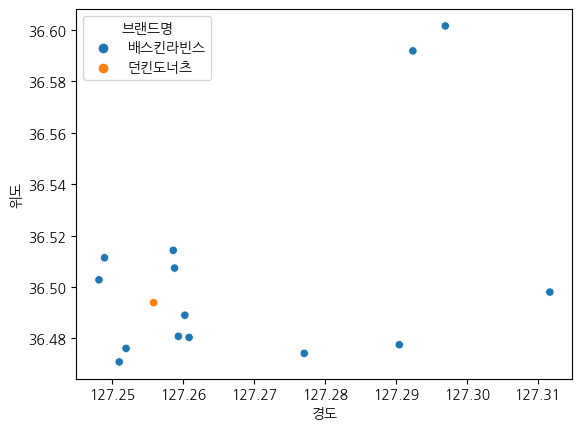

In [28]:
# 던킨과 베스킨 상점이 같은 상권에 존재 하는지 확인
sns.scatterplot(data = df_31, x  = '경도', y ='위도', hue = '브랜드명')
plt.show()

In [29]:
# 지도 시각화 
geo_df = df_31.copy()

map = folium.Map(location = [geo_df['위도'].mean(),geo_df['경도'].mean()], zoom_start = 11)

for n in geo_df.index:
  # 팝업에 들어갈 텍스트 지정
  popup_name = geo_df.loc[n, '브랜드명'] + ' - ' + geo_df.loc[n, '도로명주소']
  #브랜드명에 따라 아이콘 색상을 다르게 설정
  icon_color = 'pink'

  if geo_df.loc[n, '브랜드명'] == '던킨도너츠':
      icon_color = 'blue'
  folium.Marker([geo_df.loc[n,'위도'], geo_df.loc[n,'경도']],
                popup = popup_name,
                icon = folium.Icon(color = icon_color, icon = 'coffee', prefix = 'fa')).add_to(map)

map

In [30]:
# 지도 시각화 
geo_df = df_31.copy()

map = folium.Map(location = [geo_df['위도'].mean(),geo_df['경도'].mean()], zoom_start = 11,
                 tiles = 'CartoDB Positron')

for n in geo_df.index:
  # 팝업에 들어갈 텍스트 지정
  popup_name = geo_df.loc[n, '브랜드명'] + ' - ' + geo_df.loc[n, '도로명주소']
  #브랜드명에 따라 아이콘 색상을 다르게 설정
  icon_color = 'pink'

  if geo_df.loc[n, '브랜드명'] == '던킨도너츠':
      icon_color = 'blue'
  folium.Marker([geo_df.loc[n,'위도'], geo_df.loc[n,'경도']],
                popup = popup_name,
                icon = folium.Icon(color = icon_color, icon = 'coffee', prefix = 'fa')).add_to(map)

map

In [31]:
# 지도 시각화 
geo_df = df_31.copy()

map = folium.Map(location = [geo_df['위도'].mean(),geo_df['경도'].mean()], zoom_start = 11,
                 tiles = 'Stamen Terrain')

for n in geo_df.index:
  # 팝업에 들어갈 텍스트 지정
  popup_name = geo_df.loc[n, '브랜드명'] + ' - ' + geo_df.loc[n, '도로명주소']
  #브랜드명에 따라 아이콘 색상을 다르게 설정
  icon_color = 'pink'

  if geo_df.loc[n, '브랜드명'] == '던킨도너츠':
      icon_color = 'blue'
  folium.Marker([geo_df.loc[n,'위도'], geo_df.loc[n,'경도']],
                popup = popup_name,
                icon = folium.Icon(color = icon_color, icon = 'coffee', prefix = 'fa')).add_to(map)

map

스타벅스, 이디야 매장 위치 비교

In [35]:
shop_2022[shop_2022['상호명'].str.contains('스타벅스|starbucks|STARBUCKS')].shape

(7, 39)

In [36]:
shop_2022[shop_2022['상호명'].str.contains('이디야|ediya|EDIYA')].shape

(13, 39)

In [37]:
# 스타벅스 이디야 데이터 분석 할 df copy()
cafe_df = shop_2022[shop_2022['상호명'].str.contains('이디야|ediya|EDIYA|스타벅스|starbucks|STARBUCKS')].copy()
cafe_df.shape

(20, 39)

In [38]:
cafe_df['상호명'].value_counts()

이디야커피        12
스타벅스          5
스타벅스세종종촌점     1
이디야커피전문점      1
스타벅스세종어진점     1
Name: 상호명, dtype: int64

In [39]:
# 브랜드 컬럼을 추가
cafe_df.loc[cafe_df['상호명'].str.contains('스타벅스|starbucks|STARBUCKS'), '브랜드명'] = '스타벅스'
cafe_df[['상호명', '브랜드명']]

,상호명,브랜드명
834,스타벅스세종종촌점,스타벅스
1345,스타벅스,스타벅스
1380,이디야커피,NaN
3103,이디야커피전문점,NaN
3237,이디야커피,NaN
3354,이디야커피,NaN
3595,이디야커피,NaN
3997,스타벅스,스타벅스
4211,이디야커피,NaN
4644,스타벅스세종어진점,스타벅스


In [ ]:
# 1) 이디야를 포함하고 있는 상호명에 브랜드명을 이디야로 채우기
# cafe_df.loc[cafe_df['상호명'].str.contains('이디야|ediya|EDIYA'), '브랜드명'] = '이디야'
# cafe_df[['상호명', '브랜드명']] 

In [ ]:
# 2) 스타벅스를 포함하고 있지 않은 상호명에 브랜드명을 이디야 넣기
# cafe_df.loc[~cafe_df['상호명'].str.contains('스타벅스|starbucks|STARBUCKS'), '브랜드명'] = '이디야'
# cafe_df[['상호명', '브랜드명']]

In [41]:
# 3) fillna() 함수를 사용하여 브랜드 컬럼에 NaN 값을 이디야 넣기
cafe_df['브랜드명'].fillna('이디야', inplace = True)

In [42]:
cafe_df[['상호명', '브랜드명']]

,상호명,브랜드명
834,스타벅스세종종촌점,스타벅스
1345,스타벅스,스타벅스
1380,이디야커피,이디야
3103,이디야커피전문점,이디야
3237,이디야커피,이디야
3354,이디야커피,이디야
3595,이디야커피,이디야
3997,스타벅스,스타벅스
4211,이디야커피,이디야
4644,스타벅스세종어진점,스타벅스


In [43]:
cafe_df['브랜드명'].value_counts()

이디야     13
스타벅스     7
Name: 브랜드명, dtype: int64

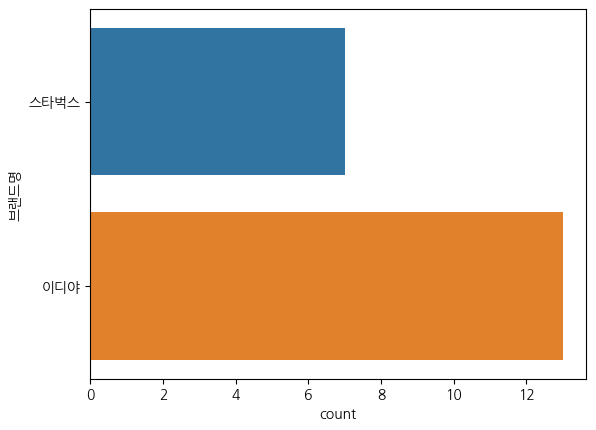

In [44]:
# 브랜드명 기준 데이터 개수 별 countplot()
sns.countplot(data = cafe_df, y = '브랜드명')
plt.show()

In [45]:
# 브랜드명 기준 스타벅스, 이디야 매장 수 분석
cafe_group_cnt = cafe_df['브랜드명'].value_counts()
cafe_group_ratio = cafe_group_cnt[0] / cafe_group_cnt[1]

In [46]:
print('제공된 데이톨 봤을 때 세종에는 이디야가 스타벅스보다 매장이 {0:.2f}배 가량 많습니다.'.format(cafe_group_ratio))

제공된 데이톨 봤을 때 세종에는 이디야가 스타벅스보다 매장이 1.86배 가량 많습니다.


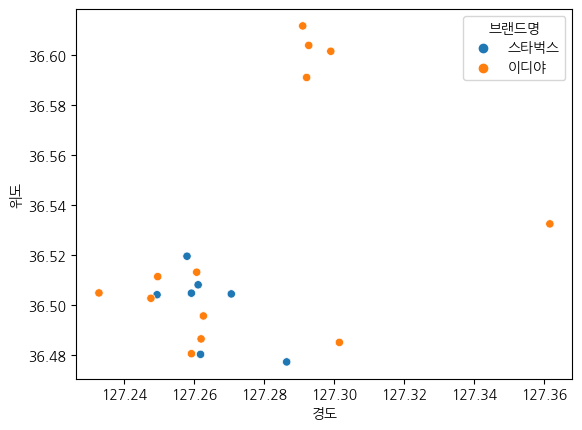

In [48]:
# 스타벅스, 이디야 매장이 같은 상권에 존재 하는지 확인
sns.scatterplot(data = cafe_df, x  = '경도', y ='위도', hue = '브랜드명')
plt.show()

지도 시각화

In [49]:
# 지도 시각화 
geo_df = cafe_df.copy()

map = folium.Map(location = [geo_df['위도'].mean(),geo_df['경도'].mean()], zoom_start = 11)

for n in geo_df.index:
  # 팝업에 들어갈 텍스트 지정
  popup_name = geo_df.loc[n, '브랜드명'] + ' - ' + geo_df.loc[n, '도로명주소']
  #브랜드명에 따라 아이콘 색상을 다르게 설정
  icon_color = 'blue'

  if geo_df.loc[n, '브랜드명'] == '스타벅스':
      icon_color = 'green'
  folium.Marker([geo_df.loc[n,'위도'], geo_df.loc[n,'경도']],
                popup = popup_name,
                icon = folium.Icon(color = icon_color, icon = 'coffee', prefix = 'fa')).add_to(map)

map

In [53]:
map = folium.Map(location = [geo_df['위도'].mean(),geo_df['경도'].mean()], zoom_start = 12, tiles = 'Stamen Toner')

for n in geo_df.index:
  # 팝업에 들어갈 텍스트 지정
  popup_name = geo_df.loc[n, '브랜드명'] + ' - ' + geo_df.loc[n, '도로명주소']
  #브랜드명에 따라 아이콘 색상을 다르게 설정
  icon_color = 'blue'

  if geo_df.loc[n, '브랜드명'] == '스타벅스':
      icon_color = 'green'
  folium.CircleMarker([geo_df.loc[n,'위도'], geo_df.loc[n,'경도']],
                popup = popup_name,
                radius = 3, 
                color = icon_color,
                fill = True,
                fill_color = icon_color).add_to(map)

map